In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from matplotlib import colors
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from statannot import add_stat_annotation

In [3]:
adata = sc.read_h5ad('scRNAseq_pancan_MALE_after_SCVI.h5ad')
adata

AnnData object with n_obs × n_vars = 497055 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch', '_scvi_batch', '_scvi_labels', 'Celltype1', 'Celltype2', 'Celltype3', 'Cancertype_TCGA', 'RL_Prediction_Only9genes', 'LOY', 'obs_names', 'Celltype2_2'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Cancertype_colors', 'Celltype1_colors', 'Celltype2_colors', 'DataID_colors', 'Organ_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'hvg', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
adata = adata[adata.obs['Celltype1']=='Epithelium',:].copy()
adata

AnnData object with n_obs × n_vars = 157029 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch', '_scvi_batch', '_scvi_labels', 'Celltype1', 'Celltype2', 'Celltype3', 'Cancertype_TCGA', 'RL_Prediction_Only9genes', 'LOY', 'obs_names', 'Celltype2_2'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Cancertype_colors', 'Celltype1_colors', 'DataID_colors', 'Organ_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'hvg', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

# SCVI for Epithelial cells

In [5]:
import scvi

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [7]:
sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000, #layer = "counts", 
                            subset = False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [8]:
scvi.model.SCVI.setup_anndata(adata, batch_key='DataSampleID')#layer = 'counts',
vae = scvi.model.SCVI(adata)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [9]:
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/51:   0%|          | 0/51 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/51:   2%|▏         | 1/51 [00:55<46:39, 55.98s/it, v_num=1, train_loss_step=4.6e+3, train_loss_epoch=4.78e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 51/51: 100%|██████████| 51/51 [46:52<00:00, 53.73s/it, v_num=1, train_loss_step=4.52e+3, train_loss_epoch=4.27e+3]

`Trainer.fit` stopped: `max_epochs=51` reached.


Epoch 51/51: 100%|██████████| 51/51 [46:52<00:00, 55.16s/it, v_num=1, train_loss_step=4.52e+3, train_loss_epoch=4.27e+3]


In [11]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = vae.get_latent_representation(adata)

In [12]:
sc.pp.neighbors(adata, use_rep = SCVI_LATENT_KEY)
sc.tl.umap(adata)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


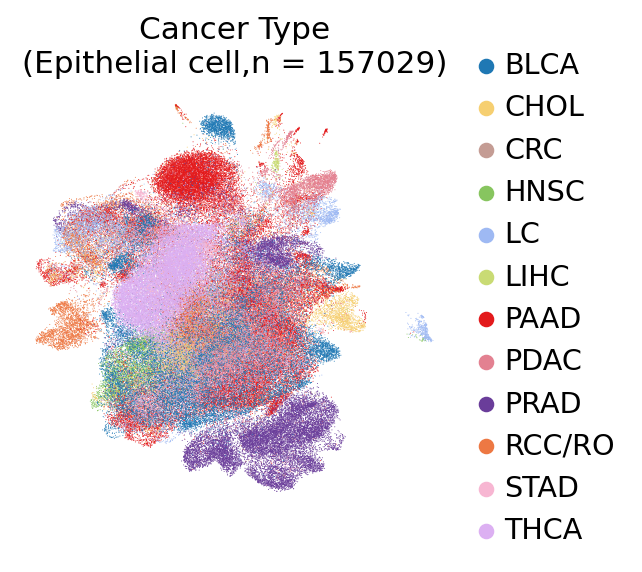

In [16]:
#Fig3d Cancertype
sc.set_figure_params(figsize=(3.5, 3.5))
sc.pl.umap(
    adata,
    color=["Cancertype_TCGA"],
    frameon=False,
    palette = {
      'BLCA': '#1f78b4',
      'CHOL': '#F6CF71',
      'CRC': '#C49C94',
      'THCA': '#DCB0F2',
      'HNSC': '#87C55F',
      'LC': '#9EB9F3',
      'LIHC': '#C9DB74',
      'PAAD':  '#e31a1c',
      'PDAC': "#E38191",
      'PRAD': '#6a3d9a',
      'RCC/RO': '#ed7843',
      'STAD': '#F7B6D2',
    },
    ncols=1,
    title=f'Cancer Type\n(Epithelial cell,n = {adata.obs.shape[0]})',
    save='Extend_Fig3d_Cancertype_UMAP_for_epi.pdf'
)

# Differential Expression Analysis

In [17]:
sc.tl.rank_genes_groups(adata, 'LOY', groups=['LOY_SCR'],
                           use_raw=False, reference='WTY_SCR', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
res = pd.DataFrame({group + '_' + key: result[key][group]  for group in groups for key in ['names','logfoldchanges','pvals','pvals_adj','scores']})
res.to_csv('Extended_Data_Table_5_Epithlium_LOYvsWTY_DGE.csv')

# Pathway Score Calculation& Visualization

# Score calculation

In [48]:
Pathways = [
    #Proliferation
    'Cell cycle','Cell.Cycle_activated','DNA replication','Tumor proliferation rate',
    'NOTCH_activated','MAPK Signaling',
    'HALLMARK_MITOTIC_SPINDLE','HALLMARK_NOTCH_SIGNALING', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
    'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_G2M_CHECKPOINT','HALLMARK_E2F_TARGETS',
    #Genomic instability
    'Homologous recombination',
    'GOBP_DOUBLE_STRAND_BREAK_REPAIR_VIA_CLASSICAL_NONHOMOLOGOUS_END_JOINING', 
    'GOBP_DOUBLE_STRAND_BREAK_REPAIR_VIA_ALTERNATIVE_NONHOMOLOGOUS_END_JOINING',
    'Mismatch Repair', 'HALLMARK_P53_PATHWAY', 'Base excision repair', 'Nucleotide excision repair',
    #Hormone
    'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ANDROGEN_RESPONSE', 
    #Oncogenesis
    'MYC_activated','RAS_activated','NFKB Signaling', 'TGF-B_activated', 
    'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_KRAS_SIGNALING_UP',
]

In [49]:
geneset = pd.read_csv('Genelist_for_scRNAseq_pancan_Epithelium.csv',index_col=0)
for path in Pathways:

    gene_list = geneset[path].dropna().tolist()
    gene_list = list(set(gene_list).intersection(adata.var_names))

    sc.tl.score_genes(
        adata, 
        gene_list, 
        ctrl_size=50, 
        gene_pool=None,
        n_bins=25, 
        score_name=path,  
        random_state=0, 
        copy=False, 
        use_raw=False
    )

In [56]:
adata.obs.loc[:,Pathways+['LOY']].to_csv('scRNAseq_pancan_Epithelial_cell_signature_scores.csv')

# Signature score visulization

In [5]:
#Scale the scoores
scores = pd.read_csv('scRNAseq_pancan_Epithelial_cell_signature_scores.csv',index_col=0)
from sklearn import preprocessing
scaled_scores = preprocessing.scale(scores.iloc[:,:-1])
scaled_scores = pd.DataFrame(scaled_scores, index = scores.index, columns = scores.columns[:-1])
scaled_scores['LOY'] = scores['LOY'].copy()

In [6]:
#Get mean value
pws = pd.DataFrame(columns = Pathways)

for j in range(0,scaled_scores.shape[1]-1):
    col = scaled_scores.columns[j]
    mean = scaled_scores.groupby('LOY')[col].mean()
    mean = pd.DataFrame(mean)
    pws[col] = mean[col].copy()

In [7]:
pws = pws.T.copy()

In [8]:
# Wilcox test
LOY = scores.loc[scores['LOY']=='LOY_SCR',:].copy()
noLOY = scores.loc[scores['LOY']=='WTY_SCR',:].copy()

import scipy
P_val = []
Stat = []
for col in pws.index:
    res = scipy.stats.ranksums( LOY.loc[:, col].dropna(),noLOY.loc[:,col].dropna())
    P_val = P_val + [res.pvalue]
    Stat = Stat+ [res.statistic]
pws['Pval'] = P_val
pws['Stat'] = Stat

# Adjust p-values by FDR
from statsmodels.stats.multitest import multipletests
pws['Pval_adjusted'] = multipletests(pws['Pval'], method = 'fdr_bh')[1]
pws

In [10]:
#Plotting function
import math
def plotting(pws,title,w,h,vmax,vmin,file):
    n = 2
    data = pd.DataFrame(index=range(0,pws.shape[0]*n),columns = ['LOY','Pathway','score','logp'])
    data['Pathway']=list(pws.index)*n

    score = []
    logp = []
    Loy = []
    cnt = 0
    for loy in pws.columns[:n]:
        Loy = Loy + [loy]*pws.shape[0]
        score = score + list(pws[loy])
      
    for i in pws['Pval_adjusted']:
        if i>1e-10:
            logp = logp + [-math.log(i,10)]
        else:
            logp = logp + [10]
    logp = logp*2        

    data['LOY'] = Loy
    data['score'] = score
    data['logp'] = logp

    fig, ax = plt.subplots(figsize=(w,h),dpi=300)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    p = ax.scatter(
            x='LOY',
            y="Pathway",
            s="logp",
            c='score',
            cmap='RdBu_r',
            data=data,
            marker="s",
            norm=norm
    )
    handles, labels = p.legend_elements(
            prop='sizes',
            color="gray",
            num=4,
            fmt="{x:.1f}"
    )
    ax.legend(
        handles,
        labels,
        title="Adjusted logp",
        bbox_to_anchor=(1, 1),
        loc="upper left",
        frameon=False,
        handletextpad=1,
        labelspacing=2,
        fontsize=2,
        title_fontsize = 2
    )
    cbar = fig.colorbar(
            p,
            shrink=0.3,
            aspect=15,
            anchor=(0.2, 0),
            location="right",
            pad=0.25
        )
    cbar.ax.yaxis.set_tick_params(color="white", direction="in", left=True, right=True,labelsize=2)
    cbar.ax.set_title("Scaled_score", loc="left",fontsize=2)
    for key, spine in cbar.ax.spines.items():
        spine.set_visible(False)

    labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=2)
    labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=2)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, pws.shape[0]+.5)
    ax.set_title(title,fontweight = 'bold',fontsize=4)
    ax.grid(False)
    plt.tick_params(left=False, bottom=False)
    plt.tick_params(axis='y', pad=2)
    plt.tick_params(axis='x', pad=-3)

    plt.savefig(file,bbox_inches='tight',dpi=300, transparent=True)

## Plotting

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

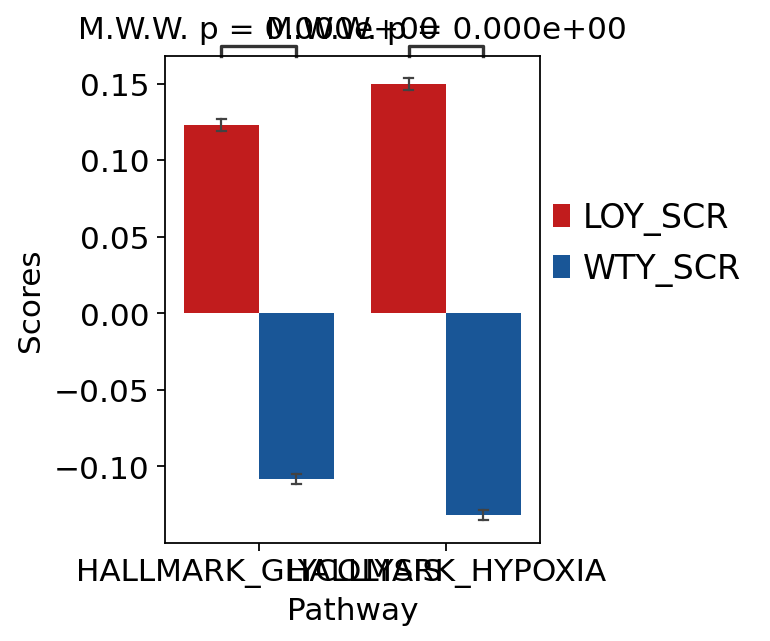

In [183]:
pathways = ['HALLMARK_GLYCOLYSIS','HALLMARK_HYPOXIA']
data = pd.DataFrame(columns=['Pathway','Scores','LOY'])
paths = []
loy = []
scores = []
for path in pathways:
    paths = paths + [path]*adata.shape[0]
    loy = loy + adata.obs['LOY'].copy().tolist()
    dt = pd.DataFrame(preprocessing.scale(adata.obs[path].copy()), index = adata.obs_names,columns = [path])
    scores = scores + dt[path].tolist()
    
data['Pathway'] = paths
data['Scores'] = scores
data['LOY'] = loy


fig,ax = plt.subplots(figsize=(3,4))

ax = sns.barplot(data=data, x='Pathway', y='Scores',
                 hue='LOY',saturation=1,#
                 hue_order=['LOY_SCR','WTY_SCR'],errorbar='se',capsize=0.05,errwidth=1,
                 palette={'LOY_SCR':'#c11c1d','WTY_SCR':'#195697'})

box_pairs = [((ca,"LOY_SCR"), (ca,"WTY_SCR")) for ca in data['Pathway'].unique()]
ax.grid(False)
plt.legend(loc = (1,0.5), fontsize = 15, frameon=False)
test_results = add_stat_annotation(ax, data=data, 
                                   x='Pathway', y='Scores', hue='LOY',
                                   box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='full',#show_test_name=False,
                                   line_offset=0,loc='outside',
                                   verbose=0)
plt.savefig('Fig3f_Epithelium_bar_Glycolysis_Hypoxia.pdf',dpi=300,bbox_inches='tight')

/tmp/ipykernel_38560/1038208289.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=2)
/tmp/ipykernel_38560/1038208289.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=2)


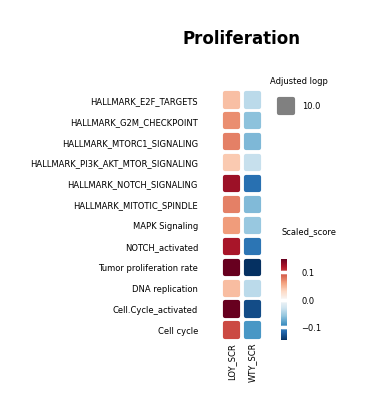

In [74]:
Proliferation = [
    'Cell cycle','Cell.Cycle_activated','DNA replication','Tumor proliferation rate',
    'NOTCH_activated','MAPK Signaling',
    'HALLMARK_MITOTIC_SPINDLE','HALLMARK_NOTCH_SIGNALING', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
    'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_G2M_CHECKPOINT','HALLMARK_E2F_TARGETS',
]
plotting(pws.loc[Proliferation,:],'Proliferation',0.3,1.2,0.15,-0.15,
         'Fig3h_Epithelium_Proliferaion_score_heatmap.pdf')

/tmp/ipykernel_29653/1038208289.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=2)
/tmp/ipykernel_29653/1038208289.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=2)


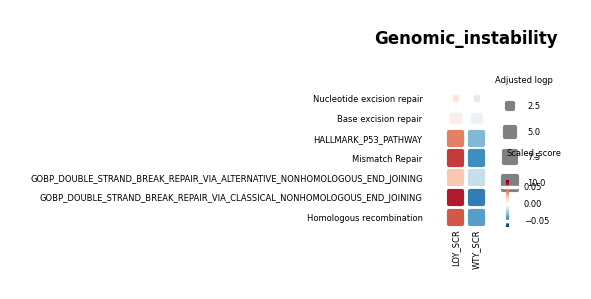

In [13]:
Genomic_instability=['Homologous recombination','GOBP_DOUBLE_STRAND_BREAK_REPAIR_VIA_CLASSICAL_NONHOMOLOGOUS_END_JOINING', 
            'GOBP_DOUBLE_STRAND_BREAK_REPAIR_VIA_ALTERNATIVE_NONHOMOLOGOUS_END_JOINING',
    'Mismatch Repair', 'HALLMARK_P53_PATHWAY','Base excision repair', 'Nucleotide excision repair'] 
     
plotting(pws.loc[Genomic_instability,:],'Genomic_instability',0.3,0.7,0.07,-0.07,
         'Fig3i_Epithelium_Genomic_instability_score_heatmap.pdf')

/tmp/ipykernel_38560/1038208289.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=2)
/tmp/ipykernel_38560/1038208289.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=2)


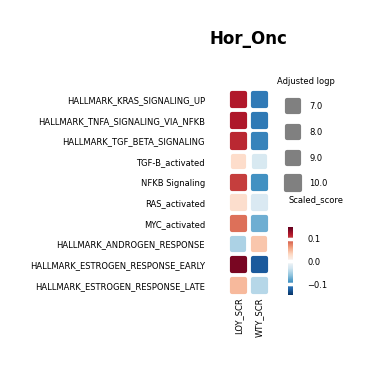

In [80]:
Hor_Onc = [
    'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ANDROGEN_RESPONSE', 
    'MYC_activated','RAS_activated','NFKB Signaling', 'TGF-B_activated', 
    'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_KRAS_SIGNALING_UP',
]
plotting(pws.loc[Hor_Onc,:],'Hor_Onc',0.3,1,0.15,-0.15,
         'figures/Fig3o_Epithelium_Genomic_Hor_Onc_heatmap.pdf')

# MHC Expression

In [168]:
MHCII = ['HLA-DRA','HLA-DRB5','HLA-DRB1',
         'HLA-DQA1','HLA-DQB1','HLA-DQA2','HLA-DQB2',
         'HLA-DOA','HLA-DOB',
         'HLA-DMA','HLA-DMB',
         'HLA-DPA1','HLA-DPB1']
MHCI = ['HLA-A','HLA-B','HLA-C','HLA-E','HLA-F','HLA-G']

In [163]:
#Scale gene expression
adata.layers['scaled'] = sc.pp.scale(adata,copy=True).X

In [190]:
def get_bar(adata, genes, n,m,ydn,yup,ysep,file):
    #DGE
    adata = adata[:,genes].copy()
    sc.tl.rank_genes_groups(adata, 'LOY', groups=['LOY_SCR'],
                            use_raw=False, reference='WTY_SCR', method='wilcoxon')
    result = adata.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    data = pd.DataFrame({key: result[key][group]  for group in groups for key in ['names','logfoldchanges','pvals','pvals_adj']})
    data.index = data['names']
    #Calculate logP
    import math
    data['logpadj'] = [-math.log(max(i,1e-10),10) for i in data[f'pvals_adj']]
    #Reorder as dotplot
    data = data.loc[genes,:].copy()
    print(data)
    #Plotting
    from matplotlib import cm
    fig, axs = plt.subplots(1,2,figsize=(n,m),width_ratios=(60,1))#
    ax = axs[0]
    norm = mpl.colors.Normalize(vmin=0,vmax=10)
    mapper = cm.ScalarMappable(norm=norm,cmap=cm.Blues)
    colors = [mapper.to_rgba(i) for i in data['logpadj']]
    sns.barplot(x=data.index, y=data['logfoldchanges'],width=0.6,saturation=1,
                palette=colors,ax=ax)
    labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set(ylim=(ydn,yup))
    y_majorocator=MultipleLocator(ysep)
    ax.yaxis.set_major_locator(y_majorocator)
    ax.grid(False)
    #Color bar
    ax = axs[1]
    mpl.colorbar.ColorbarBase(ax, cmap=cm.Blues,norm=norm)
    plt.savefig(file,dpi=300)


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

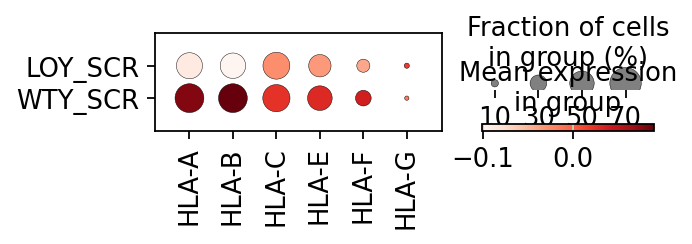

In [170]:
sc.pl.dotplot(adata, MHCI, 'LOY', layer='scaled',dendrogram=False,#vmin=-0.07,vmax=0.07,
              figsize = (4,0.8),save='Fig3g_Epithelium_LOYvsnoLOY_gene_expr_MHI.pdf')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seabo

       names  logfoldchanges          pvals      pvals_adj    logpadj
names                                                                
HLA-A  HLA-A       -0.343971  7.623509e-242  2.287053e-241  10.000000
HLA-B  HLA-B       -0.399027  1.703475e-251  1.022085e-250  10.000000
HLA-C  HLA-C       -0.097944   2.029640e-03   2.029640e-03   2.692581
HLA-E  HLA-E       -0.144729   1.633778e-66   2.450668e-66  10.000000
HLA-F  HLA-F       -0.269782   1.238958e-88   2.477916e-88  10.000000
HLA-G  HLA-G        0.235787   6.126787e-06   7.352145e-06   5.133586


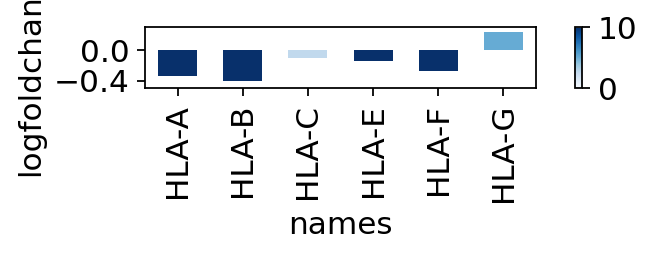

In [191]:
get_bar(adata,MHCI,3.5,0.5,-0.5,0.3,0.4,
        'Fig3g_Epithelium_LOYvsWTY_MHCI_expr_IC_bar.pdf')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

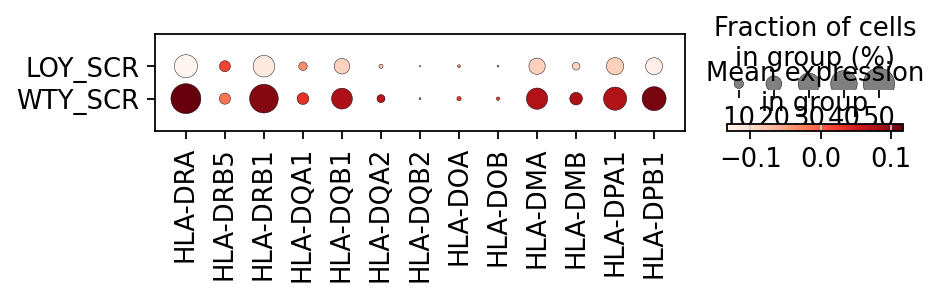

In [172]:
sc.pl.dotplot(adata, MHCII, 'LOY', layer='scaled',dendrogram=False,#vmin=-0.07,vmax=0.07,
              figsize = (6,0.8),save='ExtendedData_Fig5a_Epithelium_LOYvsnoLOY_gene_expr_MHII.pdf')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seabo

             names  logfoldchanges          pvals      pvals_adj    logpadj
names                                                                      
HLA-DRA    HLA-DRA       -0.695045   0.000000e+00   0.000000e+00  10.000000
HLA-DRB5  HLA-DRB5        0.168608   5.757144e-01   5.757144e-01   0.239793
HLA-DRB1  HLA-DRB1       -0.614352   0.000000e+00   0.000000e+00  10.000000
HLA-DQA1  HLA-DQA1       -0.354578   9.308589e-54   1.344574e-53  10.000000
HLA-DQB1  HLA-DQB1       -0.586924  1.040405e-224  2.705054e-224  10.000000
HLA-DQA2  HLA-DQA2       -1.032943   1.250866e-59   2.032658e-59  10.000000
HLA-DQB2  HLA-DQB2       -0.123812   8.473242e-02   9.179346e-02   1.037188
HLA-DOA    HLA-DOA       -0.499453   1.041911e-06   1.284322e-06   5.891326
HLA-DOB    HLA-DOB       -0.602804   1.086734e-06   1.284322e-06   5.891326
HLA-DMA    HLA-DMA       -0.558707  2.462856e-219  5.336187e-219  10.000000
HLA-DMB    HLA-DMB       -0.909603  5.817871e-135  1.080462e-134  10.000000
HLA-DPA1  HL

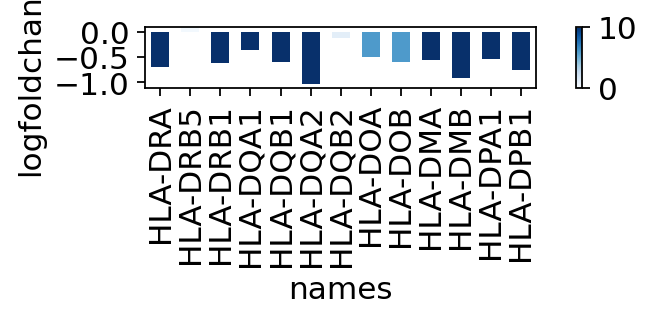

In [194]:
get_bar(adata,MHCII,3.5,0.5,-1.1,0.1,0.5,
        'ExtendedData_Fig5a_Epithelium_LOYvsWTY_MHCII_expr_IC_bar.pdf')